In [2]:
## Import necessary packages ##
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
## Load the data ##
df = pd.read_csv("../Final Project/Datasets/encounters-by-facility_2012-2023_20240702.csv")

In [8]:
## Convert year to datetime ##
df['year'] = pd.to_datetime(df['year'], format='%Y')

In [10]:
## Create new column 'visit_type' based on 'type' column ##
df['visit_type'] = df['type'].map({'ED_Admit': 'Admission', 'ED_Visit': 'Visit'})

In [12]:
## Group by year and visit type, then sum the # of counts ##
df_grouped = df.groupby(['year', 'visit_type'])['count'].sum().unstack()

## Plot 1: Total ED Visits Over Time 

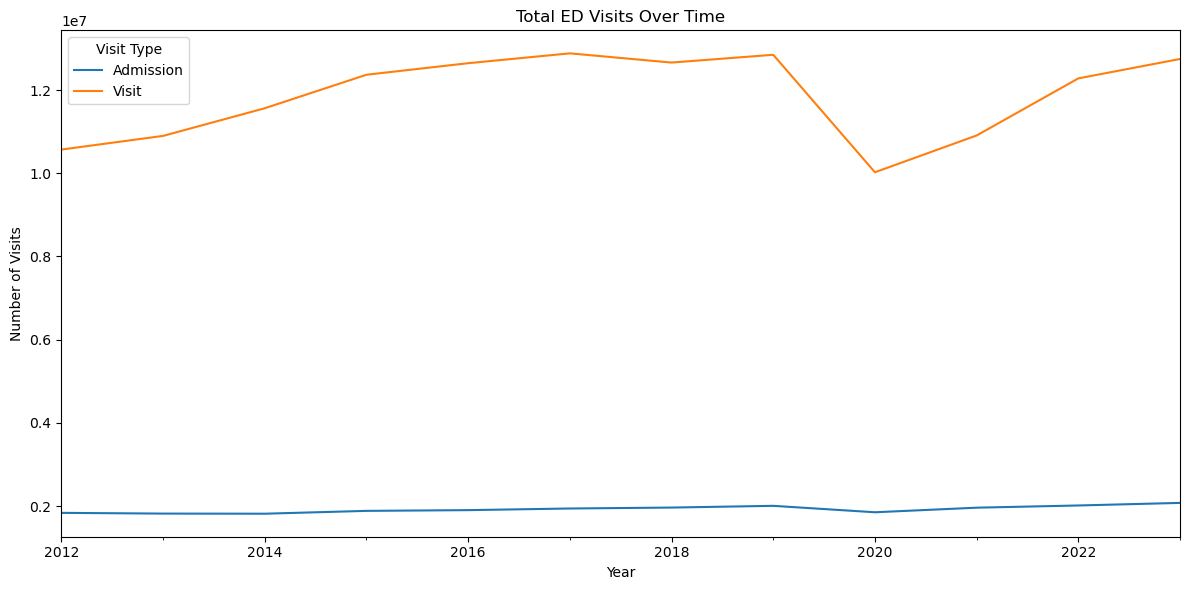

In [21]:
plt.figure(figsize=(12, 6))
df_grouped.plot(kind='line', ax=plt.gca())
plt.title('Total ED Visits Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Visits')
plt.legend(title='Visit Type')
plt.tight_layout()
plt.savefig('total_ed_visits_over_time.png')
plt.show()

## Plot 2: Top 10 ED Visits by Facility

In [25]:
top_10_facilities = df.groupby('facility_name')['count'].sum().nlargest(10).index
df_top_10 = df[df['facility_name'].isin(top_10_facilities)]

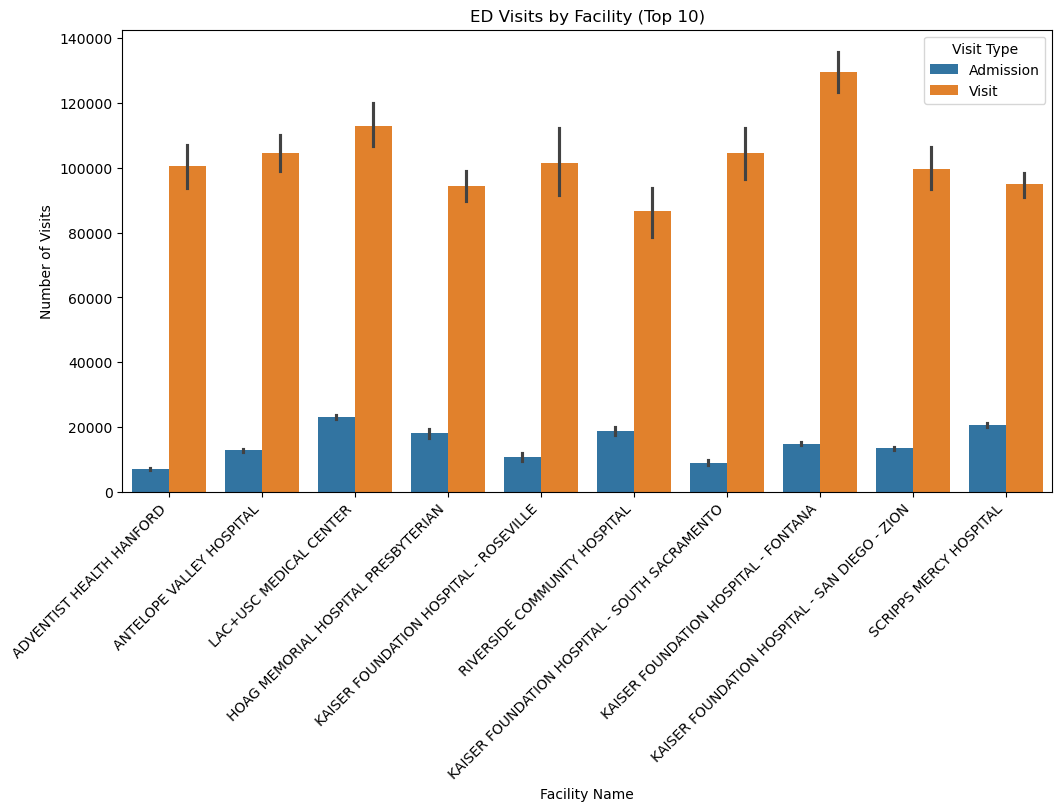

In [27]:
plt.figure(figsize=(12, 6))
sns.barplot(x='facility_name', y='count', hue='visit_type', data=df_top_10)
plt.title('ED Visits by Facility (Top 10)')
plt.xlabel('Facility Name')
plt.ylabel('Number of Visits')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Visit Type')
plt.savefig('ED_visits_by_facility_top_10.png')
plt.show()

## Plot 3: ED Visit Types Distribution:

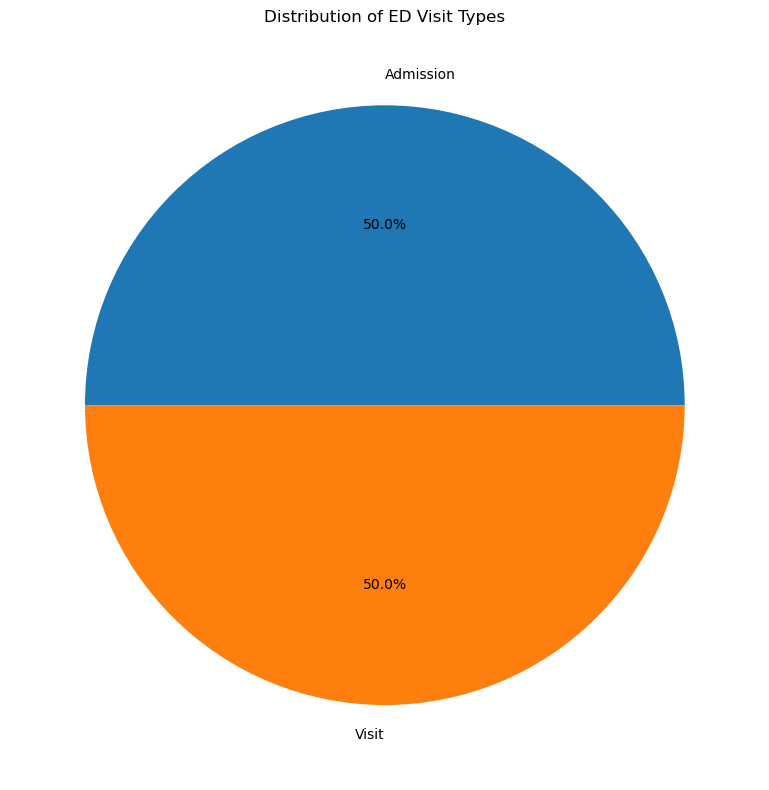

In [30]:
plt.figure(figsize=(8, 8))
df['visit_type'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Distribution of ED Visit Types')
plt.ylabel('')
plt.tight_layout()
plt.savefig('ED_visit_types_distribution.png')
plt.show()